# Mission 1 Analyse en composantes principales

Vous réaliserez une analyse en composantes principales de l'échantillon, en suivant toutes ces étapes :

analyse de l'éboulis des valeurs propres ;\
représentation des variables par le cercle des corrélations ;\
représentation des individus par les plans factoriels ;\
analyser de la qualité de représentation et la contribution des individus.\
Pour chacune de ces étapes, commentez les résultats obtenus. La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.



In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from P6_Functions import *

# ACP et K-means
#import sklearn as sk
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import cluster
from sklearn.cluster import KMeans



# Librairies graphiques
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns



In [52]:
df = pd.read_csv('datas/notes.csv' , header=0, sep=",", decimal=".")
df.sample(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
54,True,171.62,103.49,103.58,3.95,3.00,113.10
155,False,172.10,103.98,104.28,5.78,3.16,111.09
88,True,171.91,104.28,103.92,3.64,3.36,113.15
20,True,172.03,103.87,103.40,4.29,3.01,113.09
117,False,171.75,104.36,104.02,6.00,3.13,111.79


# L'ACP


 En fait, l’ACP est une méthode bien connue de réduction de dimension qui va permettre de transformer des variables très corrélées en nouvelles variables décorrélées les unes des autres.Il s’agit en fait de résumer l’information qui est contenue dans une large base de données en un certain nombre de variables synthétiques appelées : Composantes principales.
L’idée est de pouvoir projeter ces données sur l’hyperplan le plus proche afin d’avoir une représentation simple de nos données. 

L'analyse en composantes principales va nous permettre de réduire nos 6 variables quantitatives à 2. On pourra alors représenter chaque billet dans un espace à 2 dimensions. Ce qui permettra de vérifier où se situent les vrais et faux billets dans l'espace, et s'ils forment des clusters distincts. L'ACP étant sensible à la variance, on va d'abord standardiser les variables quantitatives.

Standardisation des variables est important de centrer et réduire nos variables pour atténuer l’effet d’échelle car elles ne sont pas calculées sur la même base.

Même si toutes les variables s'expriment en millimètres, leur échelle varie. Ici les marges avoisinnent 4mm alors que les longueurs dépassent 170mm. Pour que les valeurs comme celles de la longueur n'aient pas trop de poids face aux autres, il faut que toutes nos variables s'expriment dans la même unité.

Standardiser les variables consiste à les centrer autour de 0, puis réduire à 1 leur écart type (standard deviation en anglais, d'où le terme standardisation). Le centrage ne change pas la forme d'une distribution, il ne fait que la déplacer.


## Preprocessing

In [53]:
# Les données pour l'ACP.
# On exclue la colonne "is_genuine".
# C'est une vue des données de la dataframe df.
X = df.iloc[:,1:]

# Centrage et Réduction
# "Standardize features by removing the mean and scaling to unit variance"
# z = (x - u) / s
# fit "Compute the mean and std to be used for later scaling.""
# std_scale.mean_ to see the mean of the variables
std_scale = StandardScaler().fit(X)

#  Perform standardization by centering and scaling
# Contient nos valeurs standardisées.
# on aurait pu faire fit_transform.
X_scaled = std_scale.transform(X)
# Les noms des composantes
# On a une array.
noms_colonnes = X.columns #features
composantes = np.array(noms_colonnes)

# Couleurs que nous allons utiliser pour colorer chaque point en fonction de sa véracité.
color = plt.get_cmap('tab10')

# On enregistre la véracité des billets
billets = df.iloc[:, 0].values 

X_scaled = pd.DataFrame(X_scaled, columns=noms_colonnes) # Valeurs standardisées
X_scaled


,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777
...,...,...,...,...,...,...
165,0.555689,0.550431,1.581436,0.896930,1.738009,-0.857535
166,3.507789,1.761301,1.157201,0.611230,-0.510944,-1.801418
167,1.736529,0.684972,0.520847,0.382670,0.677182,-2.050950
168,-0.395543,-0.324086,-0.145809,0.168395,1.610710,-0.759892


Les variables maintenant standardisées ont toutes le même écart type, proche de 1.

In [54]:
# On créé un objet de la classe PCA.
# fit(): Fit the model with X.
# n_components = None on garde toutes les variables.
pca = PCA(n_components=None).fit(X_scaled)

# transform: Apply dimensionality reduction to X.
# On passe de 7 dimensions à 2 dimensions.
X_projected = pca.transform(X_scaled)

# Directions des composantes principales.
pcs = pca.components_

--------------------------------------------------------
--------------------------------------------------------
 Variance par composante : [47.44792058 21.95710596 14.23452433  8.52629544  4.61282244  3.22133125]
Variance expliquée : [ 47.44792058  69.40502654  83.63955087  92.16584631  96.77866875
 100.        ]


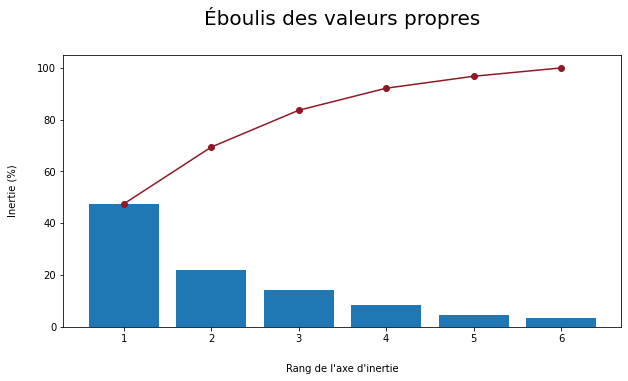

In [55]:
#choice of the number of components to calculate
n_comp = 6
#calculation of the main components

display_scree_plot(pca)
plt.savefig("graphiques/06.Screeplot.jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)

#proportion de variance expliquée 
#Le paramètre pca.explained_variance_ratio_ renvoie un vecteur de la variance expliquée par chaque dimension.
print('--------------------------------------------------------')  
print('--------------------------------------------------------')  

valprop_ratio = pca.explained_variance_ratio_*100  
print( ' Variance par composante :' ,valprop_ratio)  
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print( 'Variance expliquée :', valprop_ratio.cumsum())


La méthode du coude précise une représentation satisfaisante de nos variables sur les deux premières composantes principales, le premier axe factoriel.
Chaque composante stocke un certain pourcentage de l'information contenu dans les données, qu'on nomme variance expliquée. 
 l'analyse des éboulis (scree plot) montre leur variance expliquée toujours plus faible.
69% de la variance des données est expliquée par les deux premières composantes. 
L'analyse sera traitée ainsi, car l'ajout d'autres composantes n'apporte pas réellement de valeur ajoutée.


## Cercle des corrélations et projection des individus

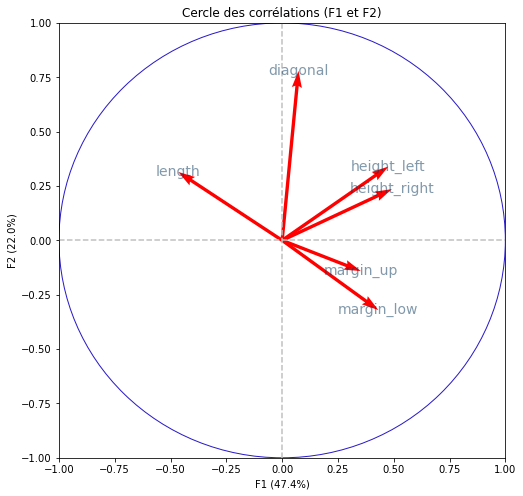

In [56]:
#circles of correlations

#figure initialization
    
display_circles(pcs, 2, pca, [(0,1)], labels = composantes)

#plt.tight_layout(pad=4)
plt.savefig("graphiques/07. Cercle des corrélations.jpg")
plt.show()

Le cercle des corrélations confirme que les dépendances entre variables ont bien été conservées après projection.
 Pour chaque variable, Notons également que la longueur des flèches est importante, la longueur de la flèche est proportionnelle à la quantité d'informations stockée par les composantes.

A partir de cette représentation graphique, nous pouvons déterminer les variables qui se révélent être les plus corrélées aux composantes F1 et F2.  une variable dont la longueur de la flèche est proche de 1 sera extrêmement bien représentée...

La corrélation entre 2 variables se déduit par l'angle que forme leurs flèches :

0° : corrélation positive
90° : absence de corrélation
180° : corrélation négative
Les corrélations entre les 6 variables de départ ont bien été conservées après réduction en 2 dimensions. Ici, les hauteurs gauche et droite sont bien corrélées positivement,\ tout comme les 2 marges. L'ACP a conservé suffisamment de données pour que la représentation sur le plan factoriel soit fiable.

F1 : Longueur du billet VS hauteur / marge
F2 : Longueur , la diagonale


L'axe de la première composante est celui qui sépare principalement les vrais billets des faux billets. De plus, F1 explique 47% de l'inertie. Sur la plupart des observations F1 permet l'identification des billets. Concernant les valeurs proches de zéro, c'est F2 qui permet de discriminer.

Le second axe explique 22% de l'inertie et participe à la séparation des vrais billets et des faux billets.



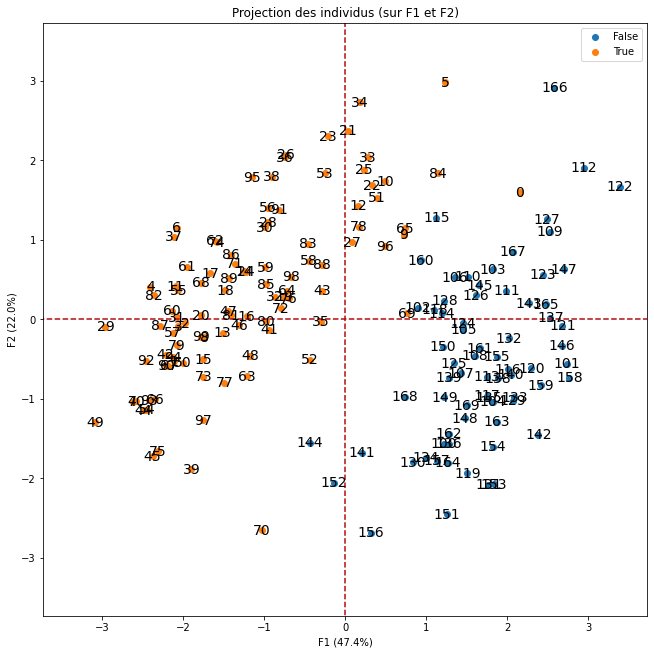

In [57]:

#figure initialization
display_factorial_planes(X_projected, 2, pca, [(0,1)], labels=df.index ,illustrative_var = billets) 
plt.tight_layout(pad=4)
plt.savefig("graphiques/08. projection des individus.jpg")

plt.show()



On voit que l'axe de la première composante est celui qui sépare principalement les vrais billets des faux billets. 
Le second axe explique 22% de l'inertie et participe à la séparation des vrais billets et des faux billets. On voit qu'une diagonale sépare clairement les vrais et les faux billets. F1 permet dans de nombreux cas de déterminer s'il s'agit d'un vrai billet ou non. Pour les valeurs proches de zéro, alors c'est la valeur de F2 qui va permettre de discriminer.


L'ACP discrimine bien les billets en 2 groupes (les authentiques et les falsifiés). Seuls quelques points sont à l'interface des 2 groupes (par exemple : billets n°0, 69, 70 , 115, 160) et pourraient poser problème pour les missions suivantes.

F1 permet dans de nombreux cas de déterminer s'il s'agit d'un vrai billet ou non. Pour les valeurs proches de zéro, alors c'est la valeur de F2 qui va permettre de discriminer.

In [58]:
# Correlation entre les composants principaux FX et les variables.
# composantes = noms des colonnes explicatives.
# pca_components_ : matrice des correlations.
matrice_correlation = pd.DataFrame(pca.components_, columns=composantes,index = ['F1','F2','F3','F4','F5','F6'])
matrice_correlation.style.background_gradient(cmap='BrBG')

,diagonal,height_left,height_right,margin_low,margin_up,length
F1,0.073275,0.475502,0.491821,0.431027,0.352540,-0.465373
F2,0.779639,0.339250,0.235543,-0.320537,-0.141120,0.314536
F3,-0.088894,0.122760,0.153830,0.512808,-0.821149,0.126913
F4,-0.559732,0.278046,0.458938,-0.226528,0.135340,0.573703
F5,-0.225094,0.715921,-0.486993,-0.311908,-0.193943,-0.254417
F6,0.122166,0.232131,-0.480813,0.547630,0.354380,0.523951


La variable diagonal contribue le plus et positivement à l'axe 2 (coef. de corrélation de 0.78)

Les variables height_left et height_right contribuent le plus et positivement à l'axe 1 (coef. de corrélation de, respectivement, 0.48 et 0.49). 

La variable lenght contribue négativement à l'axe 1 (coef. de corrélation de -0.47).

Les variables lenght et margin_low sont assez bien corrélées négativement .

In [59]:
#Calcul des composantes principales
#Ici seulement F1 et F2 seront utiles à l'interprétation attendue

df_facto = pd.DataFrame(X_projected, index=df.index, columns=["F" + str(i+1) for i in range(6)]).iloc[:, :2]
df_facto


,F1,F2
0,2.153639,1.599709
1,-2.110416,-0.526039
2,-1.973152,-0.048102
3,-2.059795,-0.089105
4,-2.403180,0.412170
...,...,...
165,2.478626,0.189974
166,2.585331,2.914472
167,2.067245,0.845602
168,0.739257,-0.972965


# Analyse de la qualité de représentation et de la contribution des individus
## Qualité de la représentation:
Dans le premier plan factoriel, on peut voir que les individus sont bien représentés car ils sont groupés par couleur. De plus les axes F1 et F2 expliquent une grande partie du pourcentage d'inertie (22% et 44%).
Dans le second plan factoriel, ce n'est plus le cas.
C'est pourquoi, on interprétera seulement la projection des individus dans le premier plan factoriel.

## Contribution des individus:
Lors du calcul des composantes principales, chaque individu est pris en compte.
Cependant, certains influent plus que d’autres sur le calcul de certaines composantes.
Il arrive parfois qu’un axe ne soit dû principalement qu’à un tout petit groupe d’individus, voire qu’à un seul. Cela signifie que quelques individus « attirent » fortement un axe dans leur direction, quasiment sans laisser les autres individus contribuer à la formation de cet axe.
Cependant, ce n'est pas notre cas. En effet, nous n'avons pas de point ou d'outlier avec des valeurs telles qu'ils attirent à eux seul les axes. On peut le voir via la projection des individus.


In [60]:
pca.singular_values_ 

array([21.99929067, 14.96537607, 12.04957045,  9.32567496,  6.85935776,
        5.73215306])

# Mission 2
Appliquez un algorithme de classification, puis analysez le résultat obtenu.

Visualisez la partition obtenue dans le premier plan factoriel de l'ACP, puis analysez-la.



# Le Principe de l'algorithme des k-means

**Le clustering ayant pour objectif de séparer vos données en groupes homogènes ayant des caractéristiques communes**. 
L’algorithme des K-moyennes (K-means) est un algorithme non supervisé très connu en matière de Clustering.


Étant donnés des points et un entier k, **l’algorithme vise à diviser les points en k groupes, appelés clusters, homogènes et compacts.**


**L’idée** est assez simple et intuitive. La première étape consiste à définir 2 centroïdes aléatoirement auxquels on associe 2 étiquettes par exemple 0,1. Ensuite nous allons pour chaque point regarder leur distance aux 2 centroïdes et nous associons le point au centroïde le plus proche et l’étiquette correspondante. Cela revient à étiqueter nos données.
Enfin on recalcule 2 nouveaux centroïdes qui seront les centres de gravité de chaque nuage de points labellisés. On répète ces étapes jusqu’à ce que les nouveaux centroïdes ne bougent plus des précédents.
Dans l’algorithme des k-moyennes généralement on utilise **la distance euclidienne**.

Il existe des méthodes pour déterminer le nombre de clusters idéal. La plus connu est la méthode du coude. Elle s’appuie sur la notion d’inertie. On définit cette dernière comme ceci : la somme des distances euclidiennes entre chaque point et son centroïde associé. Evidemment plus on fixe un nombre initial de clusters élevés et plus on réduit l’inertie : les points ont plus de chance d’être à côté d’un centroïde. 

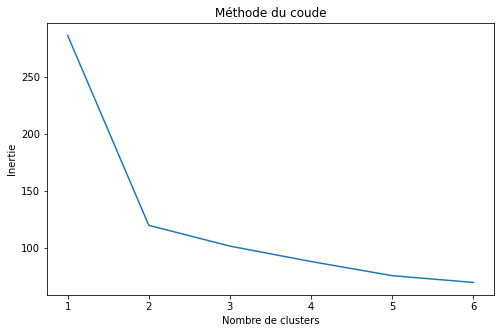

In [61]:
inertia = []
K_range = range(1,7)

for k in K_range :
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.savefig("graphiques/09. Méthode du coude KMeans.jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)
plt.show()

Par la Méthode du coude, la confirmation d'un k=2 prend tout son sens. En effet, l'ajout d'un ou plusieurs groupes n'apporterait pas d'information pertinente dans le contexte. Un k>2 serait possible dans la condition d'un jeu de données apportant une pr

In [62]:
#Intégration des clusters dans notre dataframe "df_cls" par la méthode .concat()
df_cls = pd.DataFrame(cls.fit_predict(X), columns=['cluster'])
df_cls = pd.concat([df_cls, df], axis=1)
df_cls

,cluster,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,0,True,171.67,103.74,103.70,4.01,2.87,113.29
2,0,True,171.83,103.76,103.76,4.40,2.88,113.84
3,0,True,171.80,103.78,103.65,3.73,3.12,113.63
4,0,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...,...
165,1,False,172.11,104.23,104.45,5.24,3.58,111.78
166,1,False,173.01,104.59,104.31,5.04,3.05,110.91
167,1,False,172.47,104.27,104.10,4.88,3.33,110.68
168,1,False,171.82,103.97,103.88,4.73,3.55,111.87


In [63]:
# Repérer le Cluster kmeans correspondant à is_genuine = False
cross_kmeans = pd.crosstab(df_cls['cluster'], df_cls['is_genuine']).reset_index()
cluster_false = cross_kmeans[cross_kmeans[False] > cross_kmeans[True]].cluster
#affichage des différences
df_diff = df_cls[((df_cls['is_genuine'] == True) & (df_cls['cluster'] == int(cluster_false))) | ((df_cls['is_genuine'] == False) & (df_cls['cluster'] != int(cluster_false)))]
df_diff

,cluster,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
69,1,True,171.94,104.11,104.16,4.08,3.35,111.76
102,0,False,171.94,104.21,104.10,4.28,3.47,112.23
118,0,False,171.83,104.39,104.17,5.51,3.33,113.64


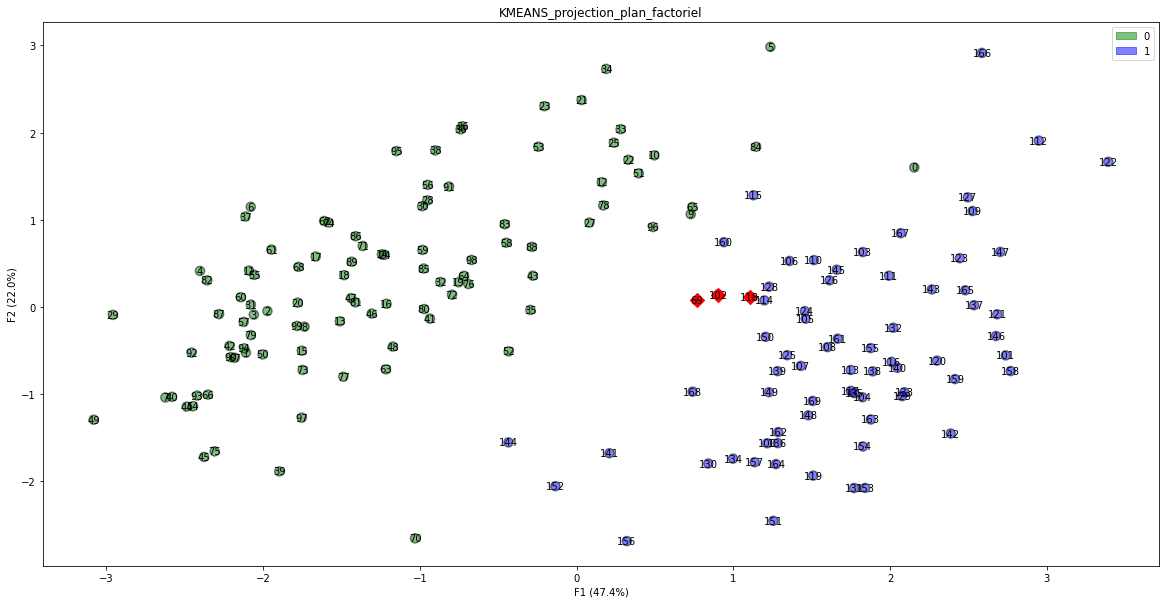

In [64]:
#Visualisation de nos deux clusters dans le premier plan factoriel

plt.figure(figsize=(20, 10))

categories = cls.labels_
colormap = np.array(['green', 'blue'])

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=colormap[categories], 
            alpha=0.5, edgecolors='black', linewidths=1.4, s=85)

lab_0 = mpatches.Patch(color='green', alpha=0.5, label='0')
lab_1 = mpatches.Patch(color='blue', alpha=0.5, label='1')
plt.legend(handles=[lab_0, lab_1])


plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("KMEANS_projection_plan_factoriel".format(X_projected.shape[0]))


# affichage des labels des points
for i,(x,y) in enumerate(X_projected[:,[0,1]]):
    plt.text(x, y, df.index[i], fontsize='10', ha='center',va='center')
 
#Affichage des points différents
for ind in df_diff.iterrows():
    plt.scatter(X_projected[ind[0],0], X_projected[ind[0],1], alpha=1, marker="D", s=100, color="r")
    
 

plt.savefig('graphiques/10. KMEANS_projection_plan_factoriel.png')
plt.show()




La classification obtenue est très similaire au découpage effectué  selon la précédente matrice illustrative True/False. 

Les losanges rouges représentent les différences Kmeans avec la variable is_genuine. Majoritairement, il s'agit de vrais billets qui sont considérés comme faux dans la classification Kmeans. On remarque que ces points 69 , 102 et 118  sont assez centraux et éloignés de leurs centroïdes respectifs.
Voyons ci-dessous les centroïdes des deux clusters pour chacune des 6 variables.

In [65]:
n_clust = 2
cls = KMeans(n_clusters=n_clust) #On créé un objet nommé "cls" de la class KMeans
cls.fit(X_scaled) #Compute k-means clustering.
# Récupération des clusters attribués à chaque billet
clusters_km = cls.labels_
#Tableau des Centroïdes 2 clusters dans sa version centrée réduite
#La comparaison est tout de suite simplifiée, les dimensions prenant la même importance!
centroids = cls.cluster_centers_
df_centroids=pd.DataFrame(centroids, columns=composantes)
df_centroids
df_centroids.style.background_gradient(cmap='BrBG')

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.064124,0.646532,0.720765,0.815858,0.642464,-0.877825
1,0.053092,-0.535301,-0.596763,-0.675496,-0.531933,0.726801


In [66]:
print("Nous avons donc une marge d'erreur de",round((df_diff.shape[0]/170)*100,2),"% sur nos 170 individus.")

Nous avons donc une marge d'erreur de 1.76 % sur nos 170 individus.


In [67]:
#Tableau des correspondances clusters/nature billets
tableau = pd.crosstab(cls.labels_,df['is_genuine'])
tableau.index = ['Cluster 0 - Faux','Cluster 1 - True']
tableau.columns = ['Faux','Vrais']
tableau

,Faux,Vrais
Cluster 0 - Faux,69,8
Cluster 1 - True,1,92


Nous remarquons que certains points, à l'interface entre les 2 clusters, peuvent être mal attribués (1 faux positif & 8 faux négatifs).

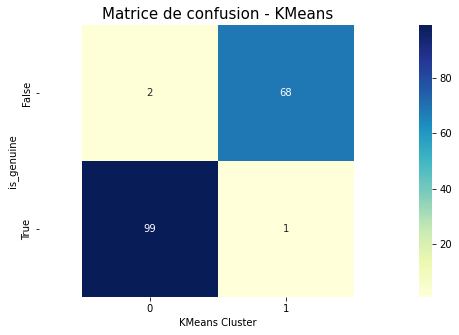

In [68]:

#labels
cluster_labels = cls.fit_predict(X)

#visualization
plt.figure(figsize=(8,5))
sns.heatmap(pd.crosstab(df.is_genuine, cluster_labels), annot=True, xticklabels=True, yticklabels=True, cmap="YlGnBu")
plt.axis("equal") 
plt.xlabel('KMeans Cluster')
plt.title("Matrice de confusion - KMeans", fontsize=15)
#plt.savefig("10. Matrice de confusion KMeans.jpg", dpi=500, bbox_inches='tight', pad_inches=0.5)
plt.savefig('graphiques/11. Matrice de confusion KMeans.jpg')

plt.show()

Les losanges rouges représentent les différences Kmeans avec la variable is_genuine. Majoritairement, il s'agit de vrais billets qui sont considérés comme faux dans la classification Kmeans. On remarque que ces points sont assez centraux et éloignés de leurs centroïdes respectifs.